# _Wrangling Drones Data_
The dataset is about delivering packages using drones in Victoria, Australia. The description of
each data column is as follows:
- **Id:** A unique id for the delivery.
- **Drone Type:** A categorical attribute for the type of the drone.
- **Post Type:** Type of Delivery.
- **Package Weight:** The weight of the package.
- **Origin Region:** A categorical attribute representing the region for the origin of the delivery.
- **Destination Region:** A categorical attribute representing the region for the destination of the delivery.
- **Origin Latitude:** Latitude of the origin.
- **Origin Longitude:** Longitude of the origin.
- **Destination Latitude:** Latitude of the destination.
- **Destination Longitude:** Longitude of the destination.
- **Journey Distance:** Distance of the journey.
- **Departure Date:** Date of the departure.
- **Departure Time:** Time of the departure.
- **Travel Time:** Travel time (i.e., duration) of the journey.
- **Delivery Time:** The time of the delivery.
- **Delivery Fare:** Delivery Price.

In [1]:
#Basic scientific python libs
import pandas as pd
import numpy as np
# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# Regular Expression
import re
# Dates
from datetime import datetime
import datetime
from datetime import timedelta
import time
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn import linear_model
# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
#Notebook displace setting
from IPython.core.display import HTML
css = open('style/style-table.css').read() + open('style/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

### Load the data using 
Loading 29421934.csv into drone dataframe.

In [2]:
# Reading dataset into dataframe.
drone =pd.read_csv('/Users/shubhank/MonashUniversity/sem2/wrangling/assignment2/29421934.csv')

Looking at the dimensionality of the data and a few lines of the data.

In [3]:
# printing shape of Drone Dataframe
print(drone.shape) 
drone.head()

(36834, 16)


,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
0,ID1911464205,1.0,0.0,23.381,34.0,17.0,-38.416065,147.537218,-38.922356,145.977527,146.803,14/01/18,19:21:41,144.42,21:46:06,95.87
1,ID1914076997,2.0,0.0,32.057,34.0,16.0,-38.291216,147.584536,-36.793188,145.336108,259.198,01/01/18,12:23:00,219.82,16:02:49,143.29
2,ID5228754678,1.0,1.0,29.892,34.0,16.0,-38.416877,147.785207,-36.788963,145.207635,290.690,04/05/18,21:58:07,279.32,2:37:26,159.12
3,ID1720150097,1.0,0.0,20.728,15.0,14.0,-38.785774,144.754998,-38.557494,143.612166,102.522,20/02/18,21:50:46,102.91,23:33:40,97.26
4,ID1407450631,1.0,0.0,6.643,28.0,26.0,-37.214424,145.541392,-36.942818,148.295337,246.430,16/05/18,4:29:35,237.82,8:27:24,113.17


<div class="alert alert-block alert-success">
<b>We have a look at some key information about each variable to answer the following questions.</b>  
-  Categorical Variables: Drone Type, Post Type, Origin Region, Destination Region  
-  Discrete: Id, Package Weight, Journey Distance, Travel Time, Delivery Fare.  
-  Continous: Origin Latitude, Origin Longitude, Destination Latitude, Destination Longitude, Departure Date, Departure Time  

In total there are 16 columns and 36834 rows.  
</div>

#### Check Datatypes of all the columns.

In [4]:
drone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36834 entries, 0 to 36833
Data columns (total 16 columns):
Id                       36809 non-null object
Drone Type               36824 non-null float64
Post Type                36814 non-null float64
Package Weight           36834 non-null float64
Origin Region            36824 non-null float64
Destination Region       36824 non-null float64
Origin Latitude          36834 non-null float64
Origin Longitude         36834 non-null float64
Destination Latitude     36834 non-null float64
Destination Longitude    36834 non-null float64
Journey Distance         36834 non-null float64
Departure Date           36834 non-null object
Departure Time           36834 non-null object
Travel Time              36794 non-null float64
Delivery Time            36834 non-null object
Delivery Fare            36804 non-null float64
dtypes: float64(12), object(4)
memory usage: 4.5+ MB


#### Looking at distribution of all the values.

In [5]:
# describing dataset
drone.describe(include='all')

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
count,36809,36824.000000,36814.000000,36834.000000,36824.000000,36824.000000,36834.000000,36834.000000,36834.000000,36834.000000,36834.000000,36834,36834,36794.000000,36834,36804.000000
unique,36774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,273,29900,NaN,29957,NaN
top,ID5836302561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13/01/18,17:55:54,NaN,6:05:30,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233,6,NaN,6,NaN
mean,NaN,1.698675,0.301978,23.186840,25.122176,25.110797,-37.728158,145.474454,-37.720601,145.458495,223.615466,NaN,NaN,200.808804,NaN,146.135101
std,NaN,0.781728,0.459122,10.686596,14.174828,14.145960,1.918117,7.011226,1.922022,6.998545,116.533276,NaN,NaN,102.776628,NaN,63.261627
min,NaN,1.000000,0.000000,5.003000,1.000000,1.000000,-39.006749,-147.690222,-39.006749,-148.432355,0.357000,NaN,NaN,7.130000,NaN,65.400000
25%,NaN,1.000000,0.000000,13.987250,13.000000,13.000000,-38.418401,144.101207,-38.413622,144.103227,133.800250,NaN,NaN,122.220000,NaN,110.820000
50%,NaN,1.000000,0.000000,22.977500,25.000000,25.000000,-37.761287,145.517271,-37.740027,145.497433,210.884500,NaN,NaN,188.535000,NaN,138.570000
75%,NaN,2.000000,1.000000,32.302750,37.000000,37.000000,-37.081036,147.151505,-37.073216,147.071197,302.921750,NaN,NaN,269.547500,NaN,170.240000


<div class="alert alert-block alert-success">
<b>Below are the observations</b>  
Total samples are 36824.  
Drone Type is a categorical feature with 1,2 or 3 values.  
Post Type  is a categorical feature with 0 or 1 values.  
Origin Region is a categorical feature with range 1 to 49.  
Desination Region is a categorical feature with range 1 to 49. 

</div>

#### Check for duplicate rows

In [6]:
# Checking if dataframe consist any duplicate row
drone.loc[drone.duplicated(keep='first'), :].head()

,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare
36774,ID1533365769,1.0,0.0,7.370,3.0,5.0,-37.671881,146.720409,-37.995627,143.897002,250.819,09/06/18,5:15:55,241.94,9:17:51,107.59
36776,ID5179245941,3.0,1.0,6.746,29.0,1.0,-37.909562,146.911443,-37.791486,142.957382,347.775,23/02/18,3:55:47,271.16,8:26:56,238.40
36778,ID5809893596,2.0,1.0,6.214,22.0,28.0,-37.707571,143.552693,-37.393442,145.354760,162.836,08/02/18,2:36:11,140.62,4:56:48,184.27
36780,ID1421984545,2.0,0.0,38.029,42.0,26.0,-38.303257,145.033545,-37.048432,148.320037,321.461,05/03/18,21:00:16,271.00,1:31:16,158.71
36781,ID1910370898,1.0,0.0,9.442,24.0,37.0,-37.035808,146.551994,-38.850301,144.241417,286.233,11/07/18,18:40:50,275.14,23:15:58,105.78


<div class="alert alert-block alert-warning">
Looks like there are duplicate rows in given dataset.
</div>

In [7]:
drone.loc[drone.duplicated(keep='first'), :].count()

Id                       35
Drone Type               35
Post Type                35
Package Weight           35
Origin Region            35
Destination Region       35
Origin Latitude          35
Origin Longitude         35
Destination Latitude     35
Destination Longitude    35
Journey Distance         35
Departure Date           35
Departure Time           35
Travel Time              35
Delivery Time            35
Delivery Fare            35
dtype: int64

<div class="alert alert-block alert-danger">
There are 35 rows which are duplicate.
</div>

#### Drop duplicate rows

In [8]:
# Dropping Duplicates
drone.drop_duplicates(keep='first', inplace=True)

#### Check Null values in Dataset

In [9]:
# Check for Null values
drone.isnull().sum()

Id                       25
Drone Type               10
Post Type                20
Package Weight            0
Origin Region            10
Destination Region       10
Origin Latitude           0
Origin Longitude          0
Destination Latitude      0
Destination Longitude     0
Journey Distance          0
Departure Date            0
Departure Time            0
Travel Time              40
Delivery Time             0
Delivery Fare            30
dtype: int64

<div class="alert alert-block alert-info">
Id has 25 Null values, dropping rows where Id is Null
</div>

#### Drop Null Id's

In [10]:
# Dropping rows with null in Id columns
drone = drone[pd.notnull(drone['Id'])]

# Numbers of row dropped = 25

### Investigating corelaton between Id and Post Type

- Extract numeric part from Id
- Plot Corelation matrix between Post Type and Id

In [11]:
# Define function to extract numeric Id from string Id
def splitId(x):
    return x.split('ID')[1]

# create numericId column in orignal dataframe
drone['numericId'] = drone['Id'].apply(lambda x: splitId(str(x)))

print('Corelation between Id and Post Type is:',drone['Post Type'].corr(drone['numericId'].astype(int)))

Corelation between Id and Post Type is: 0.9877769723987584


<div class="alert alert-block alert-success">
There is high corelation between Id and Post Type almost 0.99 
</div>

#### Predicting Post Type with Id
Splitting Dataset into test and train to check the accuracy of the model.

In [12]:
# Imputing Post type on the basis of Id


# Create dataframe excluding nan post types
drone_test = drone[drone['Post Type'].isna()==False]

# Create dataframe excluding nan Id's
drone_test = drone_test[drone_test['Id'].isna() == False]


# create numericId column in test dataframe
drone_test['numericId'] = drone_test['Id'].apply(lambda x: splitId(x))

# Select Predicators
X = drone_test['numericId']

# Select feature to predict
y = drone_test['Post Type']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3) # 70% training and 30% test

#Create KNN Classifier
knn = KNeighborsClassifier()

# Convert pandas series to datafrmae
X_train = X_train.to_frame()

# Convert pandas seried to dataframe
y_train = y_train.to_frame()

# Convert pandas series to dataframe
X_test = X_test.to_frame()

y_test = y_test.to_frame()

#Train the model using the training sets
knn.fit(X_train, y_train.values.ravel())


#Predict the response for test dataset
y_pred = knn.predict(X_test)


#Predict the response for test dataset
drone['predPostType'] = knn.predict(drone[['numericId']])


# Imputing Post type on the basis of predicted post type.
drone['Post Type'] = np.where(drone['predPostType'] != drone['Post Type']
                                  ,drone['predPostType']
                                  ,drone['Post Type'])

# Dropping predPostType column from drone dataframe
drone.drop('predPostType', 1, inplace=True)

# Dropping numericId column from drone dataframe
drone.drop('numericId', 1, inplace=True)

# Model Accuracy
print("Post Type predicted with :",metrics.accuracy_score(y_test, y_pred)*100, '% accuracy.')

Post Type predicted with : 99.90931350321937 % accuracy.


<div class="alert alert-block alert-success">
<b>KNN</b> Model is used to predict the Post type.  
Accuracy of the model is 99.89%
</div>

### Check Outliers in dataset

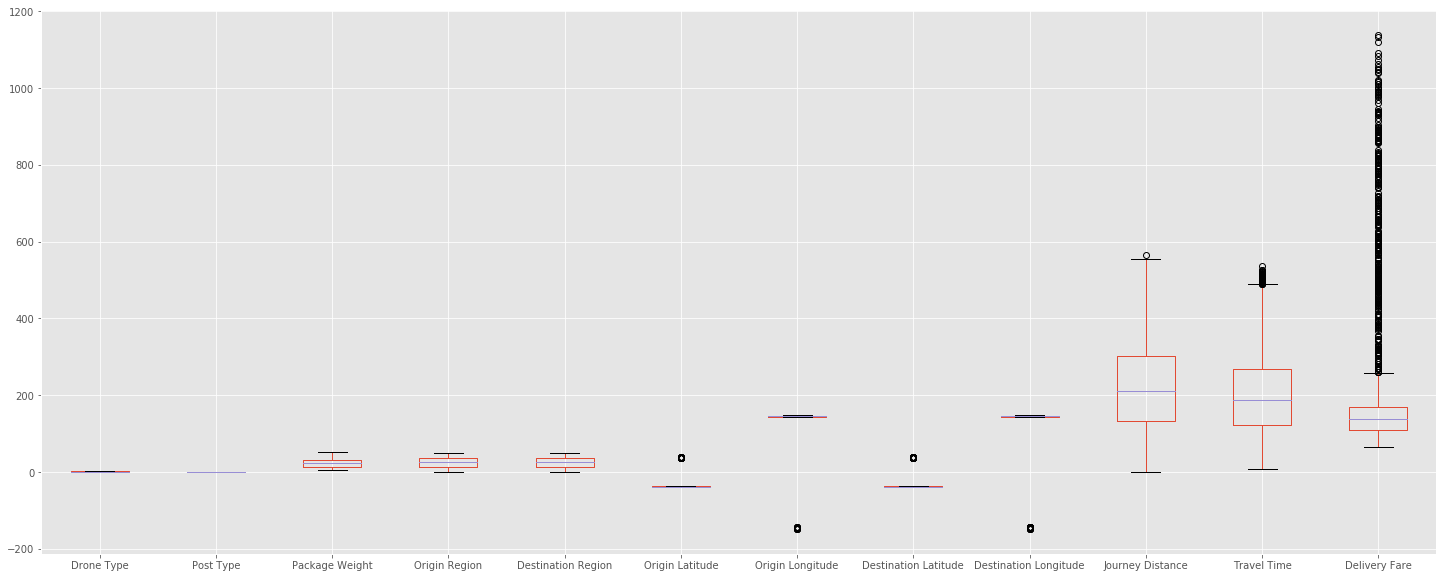

In [13]:
# checking for outliers
drone.boxplot(figsize=(25,10))

<div class="alert alert-block alert-danger">
From the above boxplot we can see that there are outliers in Origin Latitude/Longitude, Destination Latitude/Longitude ,Travel Time and Delivery Fare.
</div>

#### Fix Origin Latitude outliers
Converting positive Latitude to negative Latitude

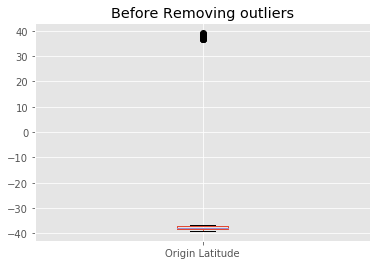

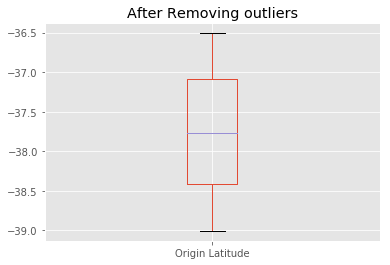

In [14]:
# fixing Origin Latitude
# Check for outliers
drone[['Origin Latitude','Id']].boxplot()
plt.title('Before Removing outliers')
plt.show()

# Define function to fix Origin Latitude
def fixLatitude(x):
    if x >0:
        return x * (-1)
    else:
        return x
    
# Call function on Origin Latitude column
drone['Origin Latitude'] = drone['Origin Latitude'].apply(lambda x : fixLatitude(x))
drone[['Origin Latitude','Id']].boxplot()
plt.title('After Removing outliers')
plt.show()

####  Fix Origin Longitude outliers
Converting negative Longitude to positive Longitude

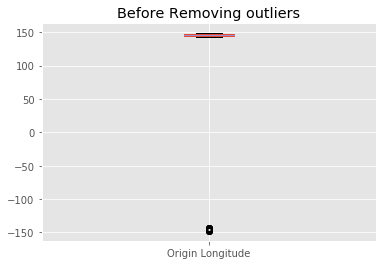

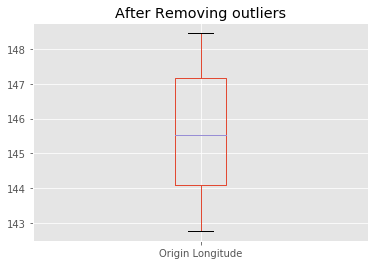

In [15]:
# fixing Origin Longitude
# Check for outliers
drone[['Origin Longitude','Id']].boxplot()
plt.title('Before Removing outliers')
plt.show()

# Define function to fix Origin Longitude
def fixLongitude(x):
    if x <0:
        return x * (-1)
    else:
        return x
    
# Call function on Origin Longitude column
drone['Origin Longitude'] = drone['Origin Longitude'].apply(lambda x : fixLongitude(x))
drone[['Origin Longitude','Id']].boxplot()
plt.title('After Removing outliers')
plt.show()

####  Fix Destination Latitude outliers
Converting positive Latitude to negative Latitude

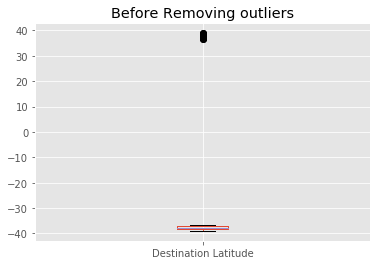

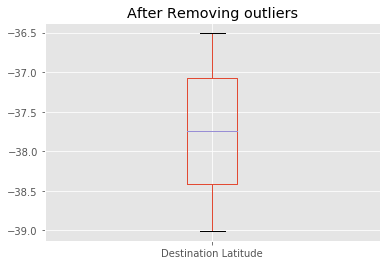

In [16]:
# fixing Destination Latitude
# Check for outliers
drone[['Destination Latitude','Id']].boxplot()
plt.title('Before Removing outliers')
plt.show()

# Call function on Destination Latitude column
drone['Destination Latitude'] = drone['Destination Latitude'].apply(lambda x : fixLatitude(x))
drone[['Destination Latitude','Id']].boxplot()
plt.title('After Removing outliers')
plt.show()

####  Fix Destination Longitude outliers
Converting negative Longitude to positive Longitude

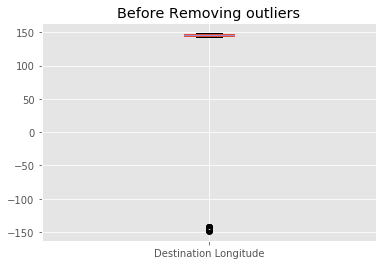

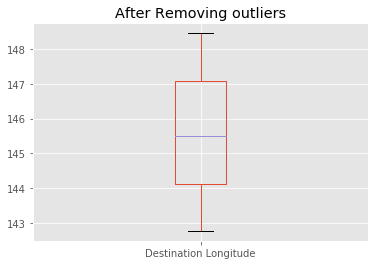

In [17]:
# fixing Destination Longitude
# Check for outliers
drone[['Destination Longitude','Id']].boxplot()
plt.title('Before Removing outliers')
plt.show()

# Call function on Destination Longitude column
drone['Destination Longitude'] = drone['Destination Longitude'].apply(lambda x : fixLongitude(x))
drone[['Destination Longitude','Id']].boxplot()
plt.title('After Removing outliers')
plt.show() 

#### Check corelation between Origin Lat/Lon and Origin Region
Plotting Scatter plot of Origin Latitude and Origin Longitude grouped by Origin Region

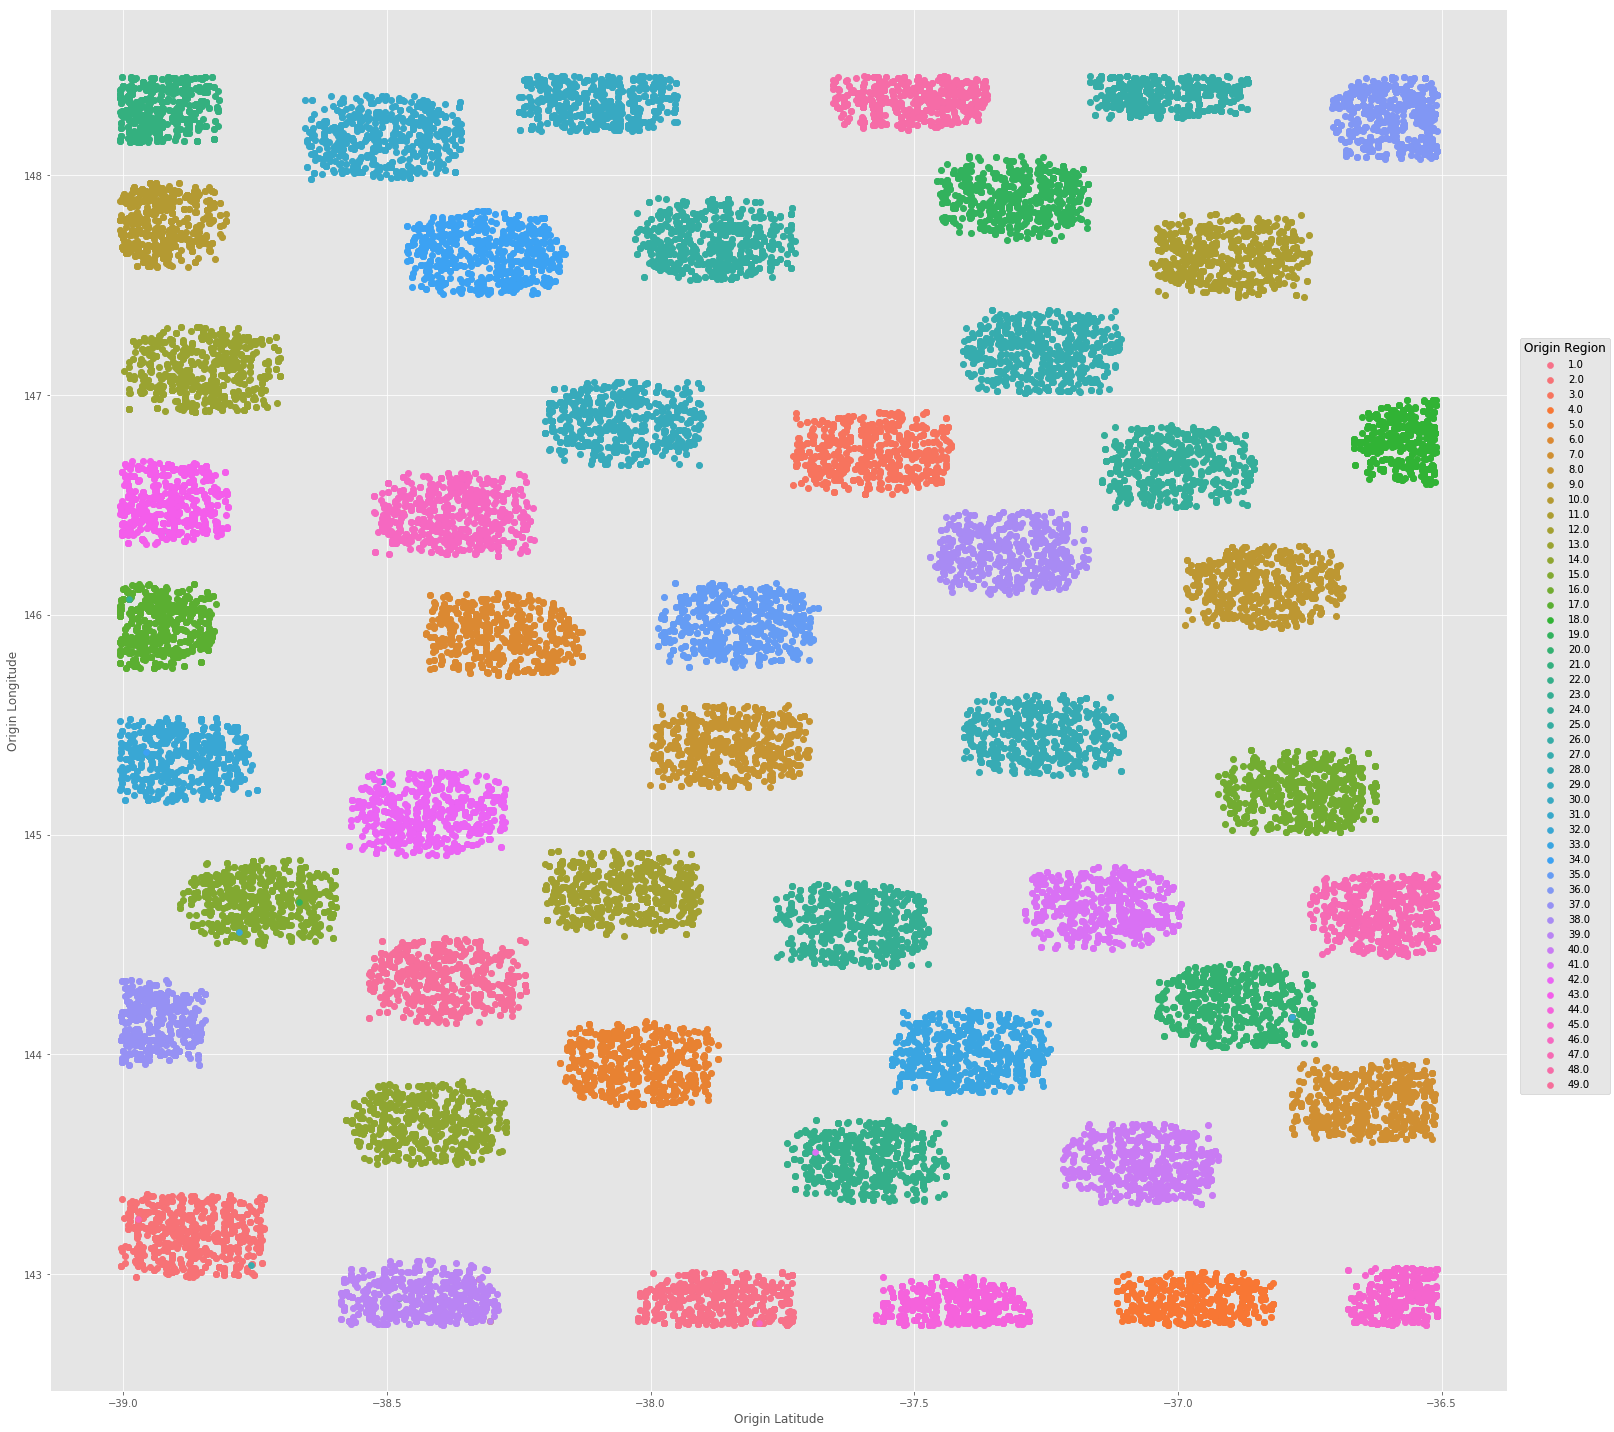

In [18]:
# Plot Origin Latitude and Origin Longitude by Origin Region
fg =sns.lmplot( x="Origin Latitude", y="Origin Longitude",
               data=drone, fit_reg=False, hue='Origin Region'
               , size = 20, aspect= 1)
fg.map(plt.scatter, 'Origin Latitude', 'Origin Longitude').add_legend()

#### Using KNN to predict Origin Region
Origin Latitude and Origin Longitude will be predicators


In [19]:
# Fixing Origin Region


# Create new dataframe, omitting nan in Origin Region
drone_test = drone[drone['Origin Region'].isna()==False]

# selecting predicators
X = drone_test[['Origin Latitude','Origin Longitude']]
# selecting variable to predict
y = drone_test['Origin Region'].dropna()

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3) # 70% training and 30% test

#Create KNN Classifier
knn = KNeighborsClassifier()

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)


# Predict Origin Region
drone['pred_origin_region'] = knn.predict(drone[['Origin Latitude', 'Origin Longitude']])

# Imputing Origin Region
drone['Origin Region'] = np.where(drone['pred_origin_region'] != drone['Origin Region']
                                 ,drone['pred_origin_region']
                                 ,drone['Origin Region'])

# Dropping pred_origin_region column
drone.drop('pred_origin_region', 1, inplace=True)
# Model Accuracy
print("Origin Region predicted with:",metrics.accuracy_score(y_test, y_pred) * 100,'% accuracy')

Origin Region predicted with: 99.9637352674524 % accuracy


<div class="alert alert-block alert-success">
<b>KNN</b> model is used to predict Origin Region.  
Accuracy of the model is 99.92 %
</div>

#### Check corelation between Origin Lat/Lon and Destination Region


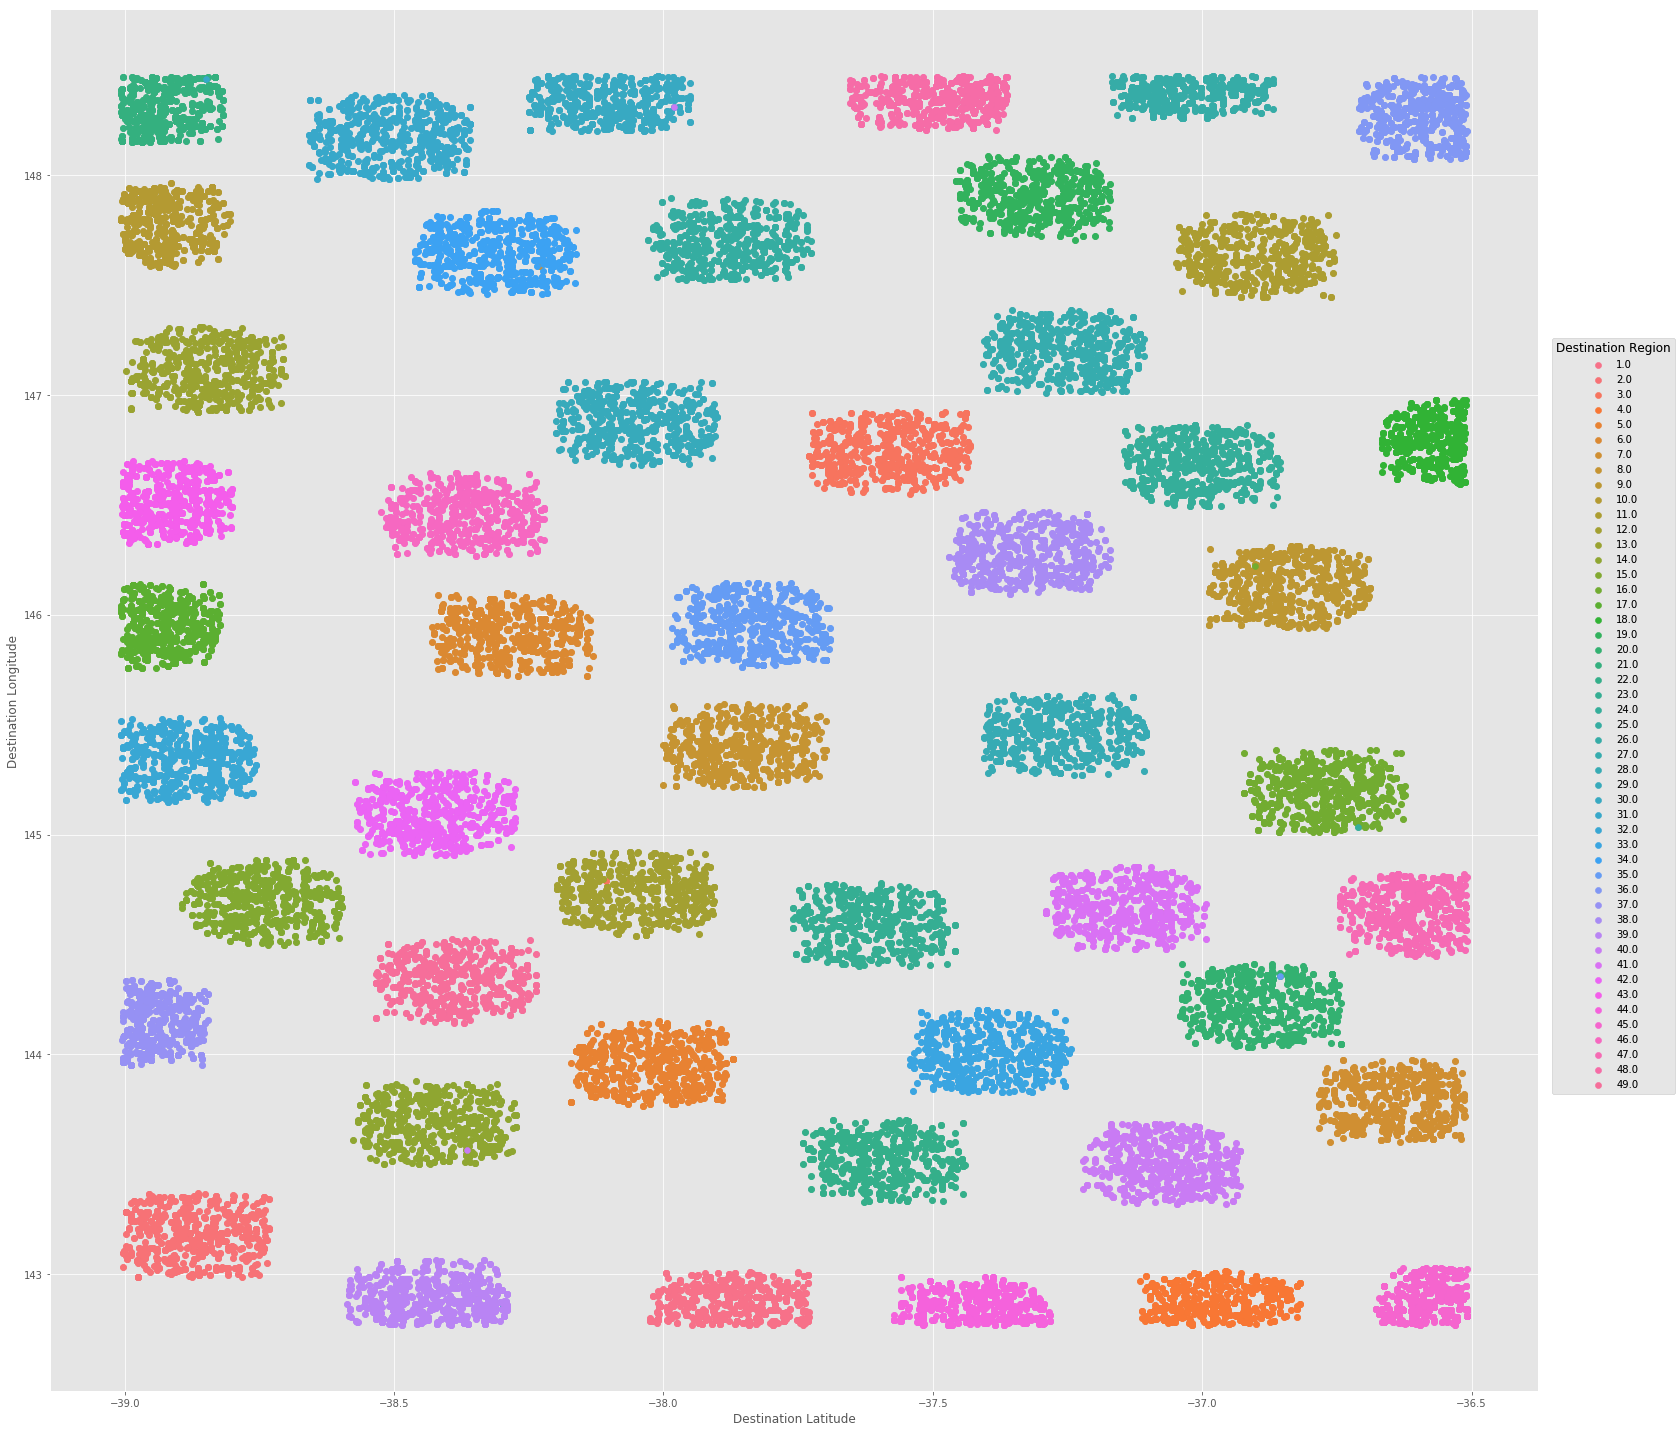

In [20]:
# Plot Destination Latitude and Destination Longitude by Destination Region
fg =sns.lmplot( x="Destination Latitude", y="Destination Longitude",
               data=drone, fit_reg=False, hue='Destination Region'
               , size = 20, aspect= 1)
fg.map(plt.scatter, 'Destination Latitude', 'Destination Longitude').add_legend()


#### Using KNN to predict Destination Region
Destination Latitude and Destination Longitude will be predicators

In [21]:
# Fixing Destination Region

# Create new dataframe, omitting nan in Origin Region
drone_test = drone[drone['Destination Region'].isna()==False]

# Select predicators
X = drone_test[['Destination Latitude','Destination Longitude']]
# Select variable to predict
y = drone_test['Destination Region'].dropna()

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3) # 70% training and 30% test

#Create KNN Classifier
knn = KNeighborsClassifier()

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100, '%')

# Predict Destination Region
drone['pred_destination_region'] = knn.predict(drone[['Destination Latitude', 'Destination Longitude']])

# Impute Destination Region
drone['Destination Region'] = np.where(drone['pred_destination_region'] != drone['Destination Region']
                                 ,drone['pred_destination_region']
                                 ,drone['Destination Region'])
# Drop pred_destination_region from Dataframe
drone.drop('pred_destination_region', 1, inplace=True)


Accuracy: 99.9637352674524 %


<div class="alert alert-block alert-success">
<b>KNN</b> model is used to predict Destination Region.
Accuracy of the model is 99.93%
</div>

#### Verify Journey Distance
Journey Distance can be calculated with the help of Origin Latitude/Longitude and Destination Latitude/Longitude

In [22]:
# Fixing Journey Distance
# Reference
# https://stackoverflow.com/questions/40452759/pandas-latitude-longitude-to-distance-between-successive-rows

# Define function to calculate distance between longitudes and latitudes
def distance(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6378 * c
    return km

# Store distance is mydistance column
drone['mydistance'] = distance(drone['Origin Longitude'], drone['Origin Latitude']
                               ,drone['Destination Longitude'], drone['Destination Latitude']
                              )

print('Journey Distance Calculated successfully.')

Journey Distance Calculated successfully.


#### Check given Journey Distance is correct
Comparing given Journey Distance with calculaed Journey Distance

In [23]:
drone[drone['Journey Distance']!=drone['mydistance']].count()

Id                       36774
Drone Type               36764
Post Type                36774
Package Weight           36774
Origin Region            36774
Destination Region       36774
Origin Latitude          36774
Origin Longitude         36774
Destination Latitude     36774
Destination Longitude    36774
Journey Distance         36774
Departure Date           36774
Departure Time           36774
Travel Time              36734
Delivery Time            36774
Delivery Fare            36744
mydistance               36774
dtype: int64

<div class="alert alert-block alert-danger">
Journey Distance of incorrect for majority of drones.
</div>

#### Impute correct Journey Distance

In [24]:
# Impute Journey Distance
drone['Journey Distance'] = drone['mydistance'].round(3)

# Drop mydistance column from dataframe
drone.drop('mydistance', 1, inplace=True)

print('Successfully imputed Journey Distance')

Successfully imputed Journey Distance


### Convert Departure Date to Datetime format
<div class="alert alert-block alert-danger">

While running datetime function on pandas Departure Date we found three date anamolies.  
- 2018-02-30  
- 2018-04-31  
- 2018-06-31  
The above dates are not possible in calendar.  
</div>

In [25]:
# This code is for departure date 

# # Anamolies
# 2018-02-30
# 2018-04-31
# 2018-06-31
# Above are not valid dates
# Dates were not in consistent format



drone['Departure Date']= drone['Departure Date'].replace('2018-02-30','2018-02-28')
drone['Departure Date']= drone['Departure Date'].replace('2018-04-31','2018-04-30')
drone['Departure Date']= drone['Departure Date'].replace('2018-06-31','2018-06-30')

# Defining function to format date
def dateConvertor(z):
    regular1 = re.compile(r'\d{2}/\d{2}/\d{2}')
    regular2 = re.compile(r'(\d{4}-(?:0[1-9]|1[1-2])-\d{2})')
    regular3 = re.compile(r'(\d{4}-\d{2}-(?:0[1-9]|1[1-2]))')
    if re.match(regular1,z):
        newdate1 = datetime.datetime.strptime(z,'%d/%m/%y').strftime('%d-%m-%Y')
        return newdate1
    elif re.match(regular2,z):
        newdate2 = datetime.datetime.strptime(z,'%Y-%m-%d').strftime('%d-%m-%Y')
        return newdate2
    elif re.match(regular3,z):
        newdate3 = datetime.datetime.strptime(z,'%Y-%d-%m').strftime('%d-%m-%Y')
        return newdate3

# Converting all the dates to same format
drone['Departure Date'] = drone['Departure Date'].apply(lambda x : dateConvertor(x))

# # Converting string to datetime
drone['Departure Date']= pd.to_datetime(drone['Departure Date'],format='%d-%m-%Y')
print('Successfully converted Departure Date to Datetime')

Successfully converted Departure Date to Datetime


<div class="alert alert-block alert-danger">
Other Issue with Departure Dates  
- Dates were not in consistent format.  
Three formats of date were found in analysis:  
<b>dd/mm/yyyy</b>  
<b>yy/mm/dd</b>  
<b>yyyy/mm/dd</b>  

Above formats were converted to one format <b>dd-mm-yyyy</b>
</div>

### Convert Departure Time and  Delivery Time to datetime format

In [26]:
# This code is for Departure Time and Delivery Time

#Converting hhmmss time to hours only
def get_hour(time_str):
    h, m, s = time_str.split(':')
    return int(h) + int(m) / 60 + int(s)/3600

# Overwriting time
drone['DepTimeHr'] = drone['Departure Time'].apply(lambda x : get_hour(x))
drone['Delivery Time'] = drone['Delivery Time'].apply(lambda x : get_hour(x))

# code for converting hours to delivery datetime
timediff = []
for i in range(0,len(drone)):
    depTime = drone.iloc[i]['DepTimeHr']
    delTime = drone.iloc[i]['Delivery Time']
    if delTime < depTime:
        delTime+=24
    timediff.append(delTime - depTime)
    #timelist.append(date + timedelta(hours = time_difference))

# Converting Departure time to hhmmss

drone['Departure Time']= pd.to_datetime(drone['Departure Time'], format='%H:%M:%S').dt.time

# Combining date and time and overwriting Departure Time column
drone['Departure Time'] = pd.to_datetime(drone['Departure Date'].astype(str)+' '+drone['Departure Time'].astype(str))
    

# converting Delivery time to date time format
datetime = []
for i in range(0, len(drone)):
    date = drone.iloc[i]['Departure Time']
    datetime.append(date + timedelta(hours = timediff[i]))

    
    
drone['Delivery Time'] = pd.DataFrame(datetime)
drone.drop('DepTimeHr', 1, inplace=True)
print('Successfully converted Departure Time and Delivery Time to Datetime')

Successfully converted Departure Time and Delivery Time to Datetime


<div class="alert alert-block alert-info">
Departure Time and Delivery Time were in Time format only.  
Both the columns were converted to Date time format.  
For quite a few drones Delivery Date is changed to next day date.  
</div>

### Calculate Travel Time from Delivery Time and Departure Time
- Subtracting Departure Time from Delivery Time to calculate Travel Time.
- Travel Time calculated is in minutes.

In [27]:
# This code is for TRAVEL TIME

# calculate Travel Time
drone['myTravelTime'] = drone['Delivery Time'] - drone['Departure Time']

# convert Travel time to minutes.
drone['myTravelTime'] = drone['myTravelTime']/pd.Timedelta('1 minute')

print('Successfully calculated Travel Time from Delivery Time and Departure Time')

Successfully calculated Travel Time from Delivery Time and Departure Time


### Calculate speed from given Travel Time
Calculate speed from Journey distance and given Travel Time

In [28]:
# Calculating speed of drone from Journey Distance and given Travel Time
# Speed is in kmph

#drone['speed'] = drone['Journey Distance']/(drone['Travel Time']/pd.Timedelta('1 hour'))
drone['speedgiven'] = drone['Journey Distance']/(drone['Travel Time']/60)

#drone['speedgiven'].head()
print('Successfully calculated speed of drone from Journey Distance and given Travel Time')

Successfully calculated speed of drone from Journey Distance and given Travel Time


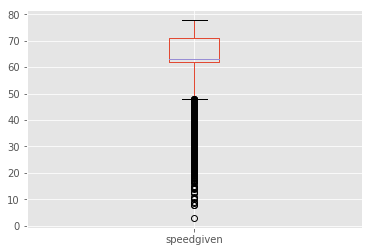

In [29]:
drone.boxplot('speedgiven')

There are outliers in speed. For few drones speed is less than 50

#### Check Average speed by Drone Type

In [30]:
drone.groupby('Drone Type')['speedgiven'].mean()

Drone Type
1.0    60.954714
2.0    68.951997
3.0    74.220479
Name: speedgiven, dtype: float64

### Calculate speed from calculated Travel Time
calculate speed from Journey distance and calculated Travel Time

In [31]:
# Calculating speed from Journey Distance and myTravelTime
drone['speedcalculated'] = drone['Journey Distance']/(drone['myTravelTime']/60)
print('Successfully calculated speed from Journey Distance and myTravelTime')

Successfully calculated speed from Journey Distance and myTravelTime


### Calculate speed difference
calculating speed difference by subtracting calculated speed from given speed

In [32]:
# Calculating Speed difference
drone['speeddiff'] = (drone['speedgiven'] - drone['speedcalculated']).abs()
print('Successfully calculated speed difference')

Successfully calculated speed difference


### Speed selection
If speed difference is greater than 1 then given speed is correct else calculated speed is correct.

In [33]:
# Check speed difference between given speed and calculated speed
# if speed difference is greater than 1 then, assume given speed is correct else calculated speed is correct.

speedcheck = []
for i in range (0,len(drone)):
    if drone.iloc[i]['speeddiff']>1:
        speedcheck.append(drone.iloc[i]['speedgiven'])
    else:
        speedcheck.append(drone.iloc[i]['speedcalculated'])
            
# Convert array to dataframe
drone['speedcheck'] = pd.DataFrame(speedcheck)
print('Speed Check column added in dataframe')
 

Speed Check column added in dataframe


#### Outliers detection in speed

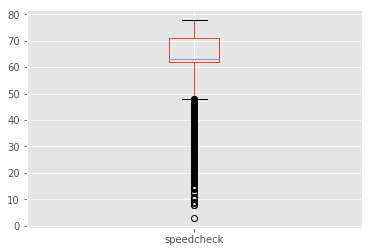

In [34]:
drone.boxplot('speedcheck')

<div class="alert alert-block alert-danger">
Still there are outliers in speed.
</div>

#### Check relation between Journey Distance and speed

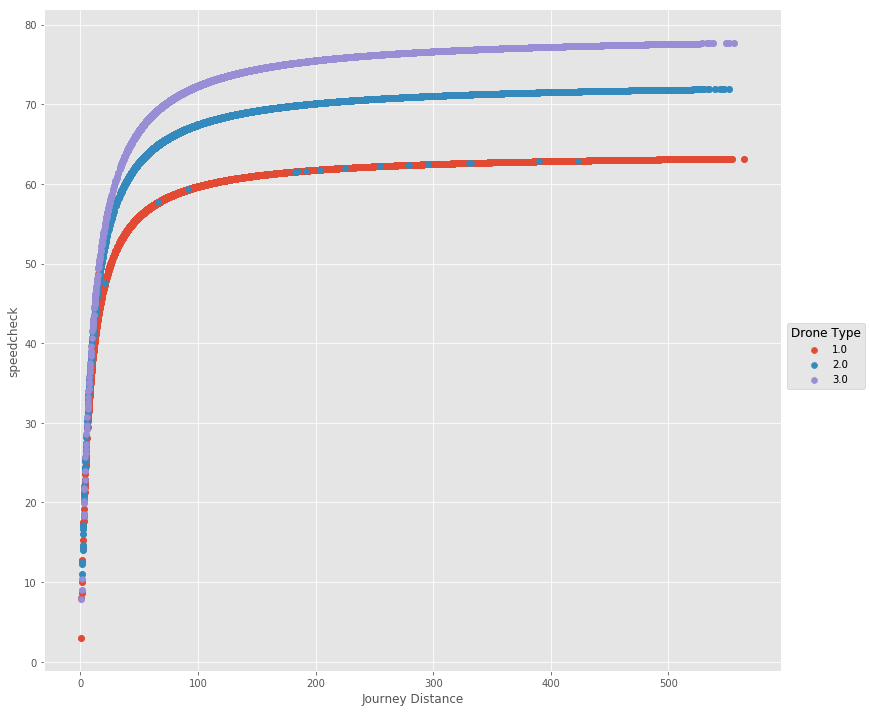

In [35]:
# Plot Destination Latitude and Destination Longitude by Destination Region
fg =sns.lmplot( x="Journey Distance", y="speedcheck",
               data=drone, fit_reg=False, hue='Drone Type'
               , size = 10, aspect= 1)
fg.map(plt.scatter, 'Journey Distance', 'speedcheck').add_legend()

<div class="alert alert-block alert-info">
We know that Journey distance is,  
takeoff distance + inair distance + landing distance  

WKT Takeoff and landing take 5 mins of time.  

From the above plot we can see that, when distance is less or (<20 KM) drone speed varies. Otherwise each drone type has different speed.
</div>

### Impute Travel Time wrt speed

In [36]:
# Calculating Travel Time wrt imputed speed
drone['newTravelTime'] = (drone['Journey Distance']/drone['speedcheck']) * 60
#drone['newTravelTime'] = (drone['Journey Distance']/drone['speedImpute']) * 60
drone['Travel Time'] = drone['newTravelTime']

# drop newTravelTime column from dataframe

print('Travel Time calculated successfully')

Travel Time calculated successfully


### Impute Delivery Time wrt Travel Time

In [37]:
# Calculating Delivery Time wrt to above calculated Travel Time

# Declare array to store new Delivery Time
newDeliveryTime = []
for i in range(0, len(drone)):
    date = drone.iloc[i]['Departure Time']
    newDeliveryTime.append(date + timedelta(minutes = drone.iloc[i]['newTravelTime']))


drone['newDeliveryTime'] = pd.DataFrame(newDeliveryTime)
drone['Delivery Time']  = drone['newDeliveryTime']
print('Done')

Done


#### Plot Travel Time and Journey Distance by Drone Type
Plotting Travel Time and Journey Distance, color is by Drone Type

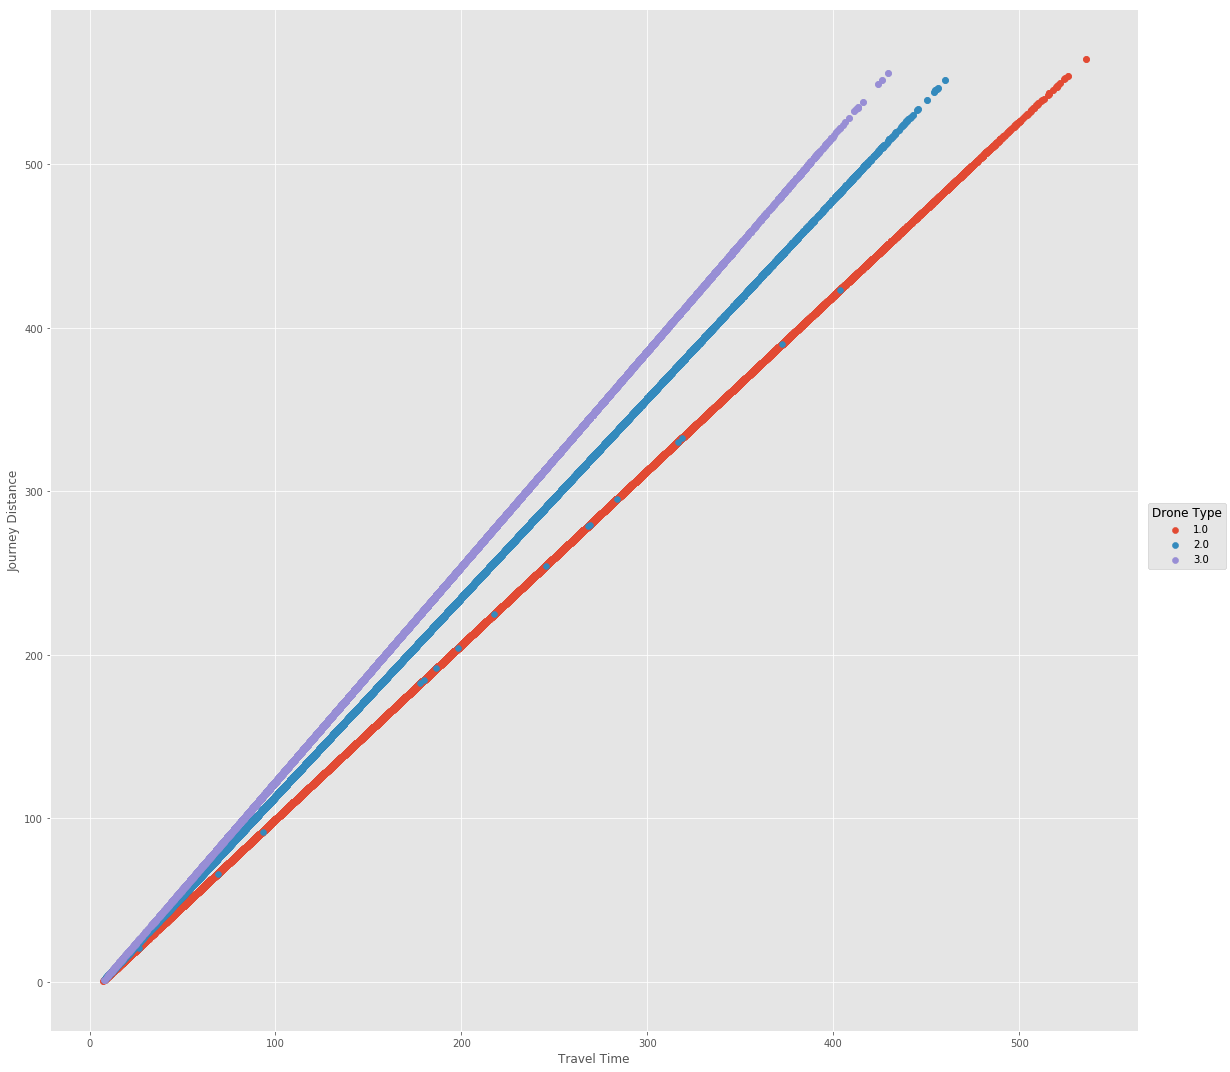

In [38]:
# Plot Destination Latitude and Destination Longitude by Destination Region
fg =sns.lmplot( x="Travel Time", y="Journey Distance",
               data=drone, fit_reg=False, hue='Drone Type'
               , size = 15, aspect= 1)
fg.map(plt.scatter, 'Travel Time', 'Journey Distance').add_legend()

<div class="alert alert-block alert-danger">
From the above plot we can see that Drone Type is incorrectly mapped to few drone.
</div>

### Impute Drone Type by Travel Time and Journey Distance

In [39]:
# Predicting with Travel Time and Journey Distance

# Ignore Drone Type null
drone_speed_test =drone[drone['Drone Type'].isna()==False]

# Select Predicators
X = drone_speed_test[['Travel Time', 'Journey Distance']]

# Select feature to predict
y = drone_speed_test['Drone Type']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3) # 70% training and 30% test

#Create KNN Classifier
knn = KNeighborsClassifier()

#Train the model using the training sets
knn.fit(X_train, y_train.values.ravel())

#Predict the response for test dataset
y_pred = knn.predict(X_test)


# Precit Drone Type
drone['predDronType'] = knn.predict(drone[['Travel Time', 'Journey Distance']])

# Impute Drone Type
drone['Drone Type'] = np.where(drone['Drone Type'] != drone['predDronType']
                                 ,drone['predDronType']
                                 ,drone['Drone Type'])
# Drop predDronType column
drone.drop('predDronType', 1, inplace=True)


# Model Accuracy
print("Drone Type prediction accuracy:",metrics.accuracy_score(y_test, y_pred))

Drone Type prediction accuracy: 0.9966455122393473


#### Plot corelation graph

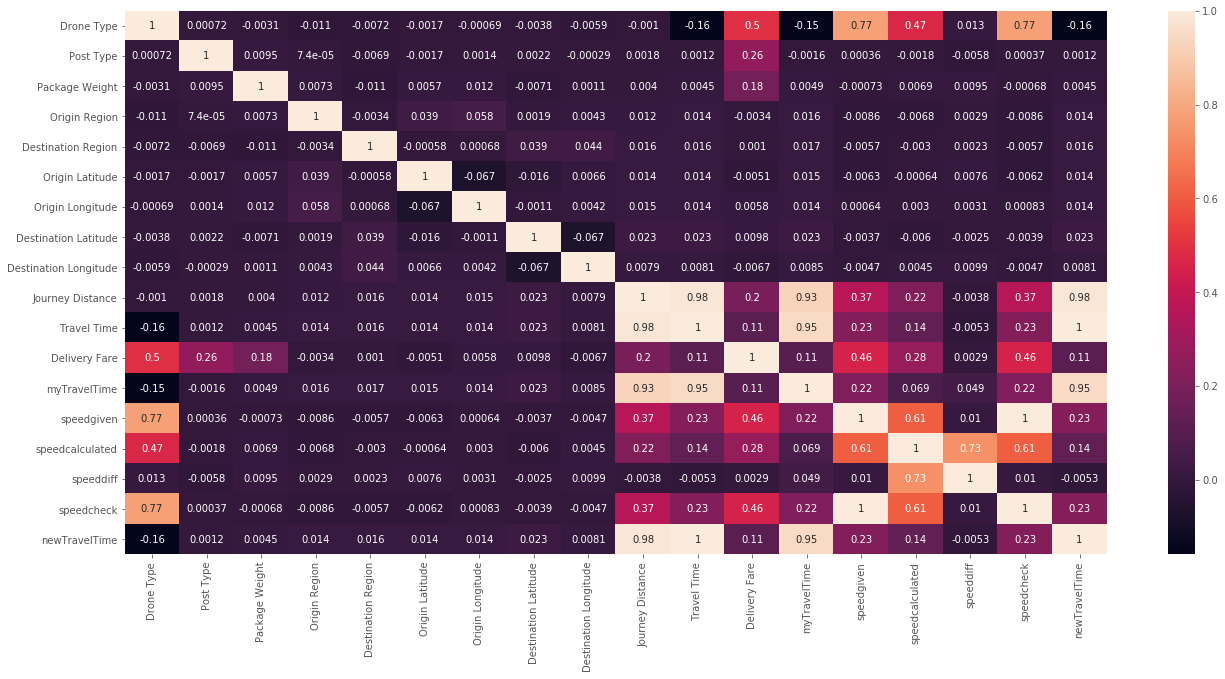

In [40]:
# Checking corelations between variables.
import seaborn as sns
corr = drone.corr()
fig, ax = plt.subplots(figsize=(22,10)) 
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,ax = ax, annot=True)

<div class="alert alert-block alert-success">
Using corelation graph to predict Delivery Fare.  
<b>Delivery Fare</b> is Linearly releated to,  
- Drone Type  
- Post Type  
- Package Weight  
- Journey Distance  
</div>

### Investigate Delivery Fare

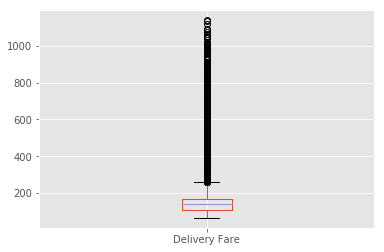

In [41]:
drone.boxplot('Delivery Fare')

<div class="alert alert-block alert-warning">
There are lot of outliers in Delivery Fare.
In order to predict Delivery Fare we have to remove outliers for our prediction model.
</div>

#### Calculate IQR for Delivery Fare and remove Outliers

In [42]:
# Remove null values from Delivery Fare
drone_fare =drone[drone['Delivery Fare'].isna()==False]
drone_fare['Delivery Fare'].describe()

count    36744.000000
mean       146.138761
std         63.294248
min         65.400000
25%        110.817500
50%        138.560000
75%        170.232500
max       1138.230000
Name: Delivery Fare, dtype: float64

***
Quartile Ranges of <b>Delivery Fare</b> are given as,  
Q1 = 110.817500  
Q2 = 138.560000  
Q3 = 170.232500  

<b>IQR is given as,</b>  
$ IQR = Q3 - Q1 $

Upper limit and Lower Limit can be calculated as,  
$min = Q1 - (IQR * 1.5) $  
$max = Q3 + (IQR * 1.5) $
***


In [43]:
# calculate IQR
IQR = 170.232500 - 110.817500

# Calculate Delivery Fare Lower Limi
minFare = 110.817500 - (IQR*1.5)

# Calculate Delivery Fare Upper Limi
maxFare = 170.232500 + (IQR*1.5)
print('Done')

Done


#### Predict Delivery Fare

Predicting Delivery Fare from Drone Type, Post Type, Package Weight, Journey Distance

In [44]:
# Filter outliers and create new dataframe.
drone_fare_filter = drone_fare[(drone_fare['Delivery Fare']>minFare) & (drone_fare['Delivery Fare']<maxFare)]

# Select predicators
X = drone_fare_filter[['Drone Type', 'Post Type','Package Weight','Journey Distance']] 

# Select variable to predict
y = drone_fare_filter['Delivery Fare']

# split dataframe into train and test data.
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3)

# Instiantiate LinearRigression
model = linear_model.LinearRegression()

# Train model
model.fit(X_train, y_train)

# Predict Delivery Fare on Test Data
y_predict = model.predict(X_test)


drone['predFare'] = model.predict(drone[['Drone Type', 'Post Type','Package Weight','Journey Distance']])

drone['Delivery Fare'] = np.where(drone['Delivery Fare'] != drone['predFare']
                                 ,drone['predFare']
                                 ,drone['Delivery Fare'])
# drop predFare from dataframe
drone.drop('predFare', 1, inplace=True)

print('Delivery Fare predicted with ',model.score(X_test,y_test)*100, '% accuracy')

Delivery Fare predicted with  92.1755318704587 % accuracy


### EDA

#### Drone Average Speed

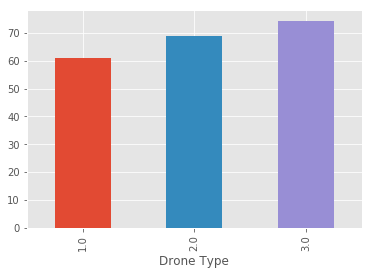

In [45]:
avgspeed = drone.groupby('Drone Type')['speedcheck'].mean()
avgspeed.plot.bar()


In [46]:
# calculate average speed of drones by Drone Type
drone.groupby('Drone Type')['speedcheck'].mean()

Drone Type
1.0    60.950831
2.0    68.906484
3.0    74.307100
Name: speedcheck, dtype: float64

#### Delivery Fare by Drone Type

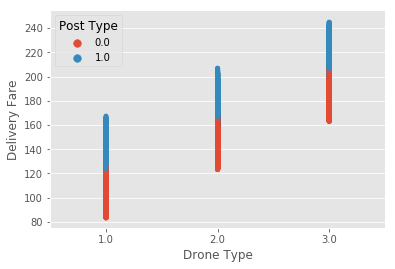

In [47]:
#drone.hist('Delivery Fare')
#sns.distplot(drone['Delivery Fare'],)
sns.stripplot(x = "Drone Type", y = "Delivery Fare", data = drone, hue='Post Type')

***
<b>Plotting Drone Type vs Delivery Fare.</b>  
There is increase in Delivery Fare from Drone Type 1 to 3.  
Moreover, Delivery Fare is high for Post Type 1
***

#### Delivery Rate

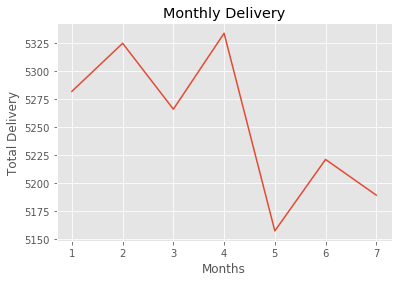

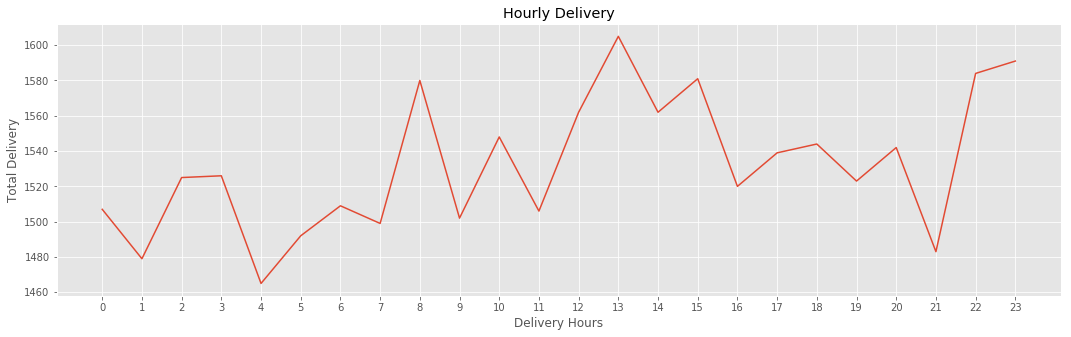

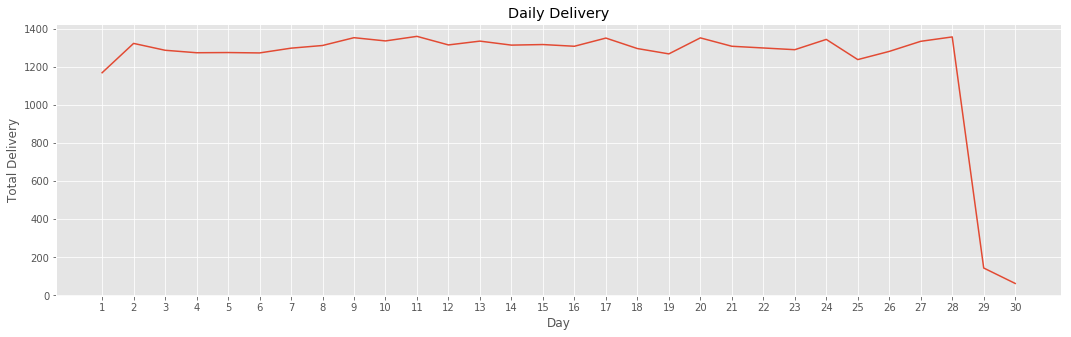

In [48]:
# This code is for Delivery by Month

delivery_by_month = drone.groupby(drone['Delivery Time'].dt.month).size()

#Plotting the Graph
plot_by_month = delivery_by_month.plot(title='Monthly Delivery',xticks=(1,2,3,4,5,6,7))
plot_by_month.set_xlabel('Months')
plot_by_month.set_ylabel('Total Delivery')
plt.show()

# This code is for Delivery by hour
delivery_by_hr = drone.groupby(drone['Delivery Time'].dt.hour).size()
plot_by_hour = delivery_by_hr.plot(title='Hourly Delivery',xticks=(range(0,24)),figsize=(18,5))
plot_by_hour.set_xlabel('Delivery Hours')
plot_by_hour.set_ylabel('Total Delivery')
plt.show()

# This code is for Delivery by day

delivery_by_day = drone.groupby(drone['Delivery Time'].dt.day).size()

#Plotting the Graph
plot_by_day = delivery_by_day.plot(title='Daily Delivery',xticks=(range(1,31)), figsize=(18,5))
plot_by_day.set_xlabel('Day')
plot_by_day.set_ylabel('Total Delivery')
plt.show()



***
- Maximum packages were delivered in April Month.  
- Majority of packages were delivered in Morning and evening time.  
- Delivery rate plummeted for end of the month.
***


#### Delivery by Regions

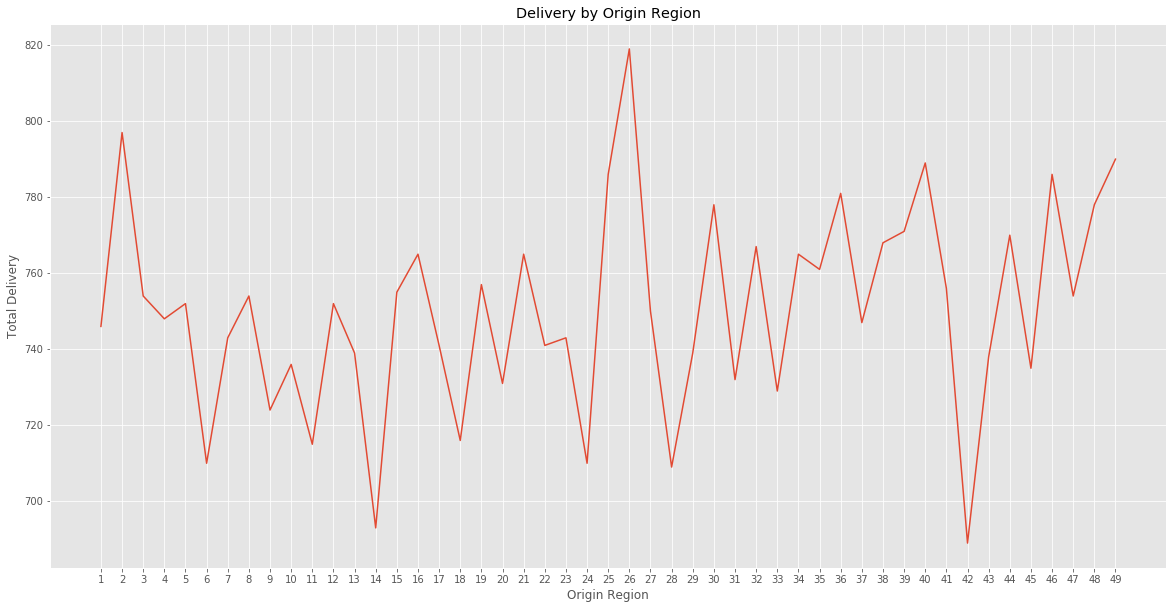

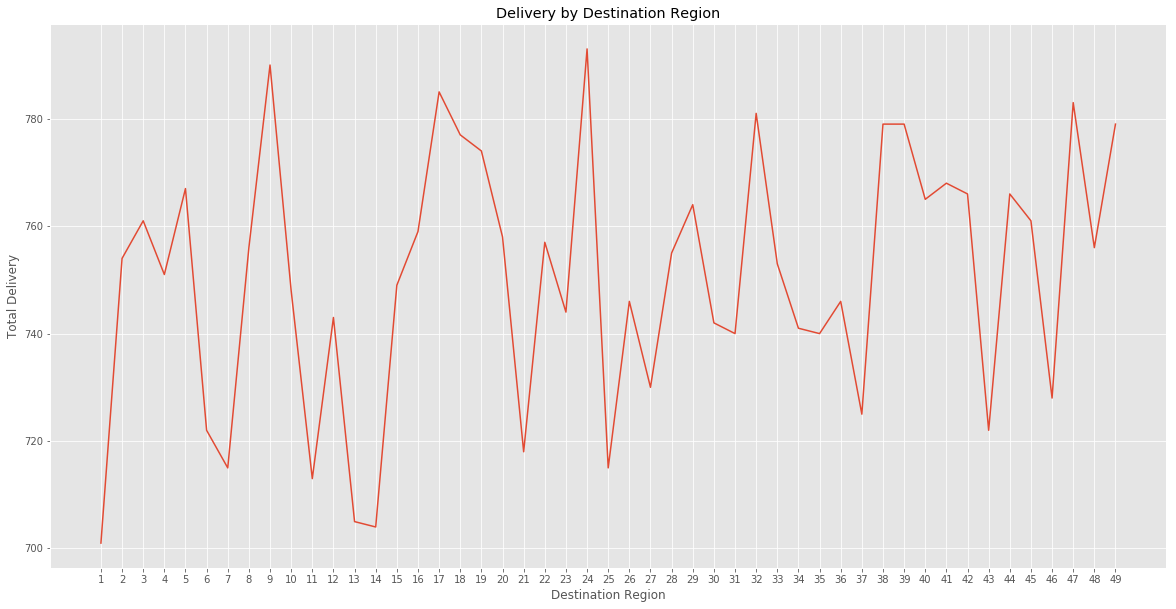

In [49]:
#sns.distplot(drone['Origin Region'], bins = 50)
delivery_by_origin = drone.groupby(drone['Origin Region']).size()
plot_by_origin = delivery_by_origin.plot(title='Delivery by Origin Region',xticks=range(1,50), figsize=(20,10))
plot_by_origin.set_xlabel('Origin Region')
plot_by_origin.set_ylabel('Total Delivery')
plt.show()

delivery_by_destination = drone.groupby(drone['Destination Region']).size()
plot_by_destination = delivery_by_destination.plot(title='Delivery by Destination Region',xticks=range(1,50), figsize=(20,10))
plot_by_destination.set_xlabel('Destination Region')
plot_by_destination.set_ylabel('Total Delivery')
plt.show()


#drone.groupby(drone['Origin Region']).size()

***
- Origin Region 26 is the busiest of all the regions.
- Destination Region 9, 17, 24, 32 were top busy regions.
***

#### Cleaning Dataframe

In [50]:
# Dropping extra columns used for analysis.
drone.drop('speedgiven', 1, inplace=True)
drone.drop('myTravelTime', 1, inplace=True)
drone.drop('speedcalculated', 1, inplace=True)
drone.drop('speeddiff', 1, inplace=True)
drone.drop('speedcheck', 1, inplace=True)
drone.drop('newTravelTime', 1, inplace=True)
drone.drop('newDeliveryTime', 1, inplace=True)
print('Done')

Done


In [51]:
# changing datetime to time format
drone['Departure Time'] = drone['Departure Time'].dt.time
drone['Delivery Time'] = drone['Delivery Time'].dt.time
print('Done')

Done


#### Import Dataframe to csv

In [52]:
drone.to_csv('29421934_solution.csv', sep=',',index=False)